# Lab 3: Clustering Analysis Using K-Means and K-Medoids Algorithms

**Student Name:** Aashish Shrestha

**Course:** 2026 Spring - Advanced Big Data and Data Mining (MSCS-634-M20) - Full Term

**Assignment:** Lab 3: Clustering Analysis Using K-Means and K-Medoids Algorithms

**Date:** February 7, 2026

## Step 1: Load and Prepare the Dataset

In this section, we will:
- Import necessary libraries
- Load the Wine Dataset from sklearn
- Explore the dataset structure and class distribution
- Standardize features using z-score normalization (StandardScaler)

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, adjusted_rand_score, silhouette_samples
from sklearn.decomposition import PCA

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the Wine Dataset
wine_data = load_wine()
X = wine_data.data
y = wine_data.target

# Create a DataFrame for exploration
wine_df = pd.DataFrame(X, columns=wine_data.feature_names)
wine_df['target'] = y

print("Wine Dataset loaded successfully!")
print(f"\nDataset shape: {wine_df.shape}")
print(f"Number of features: {len(wine_data.feature_names)}")
print(f"Number of classes: {len(wine_data.target_names)}")
print(f"Class names: {wine_data.target_names}")

Wine Dataset loaded successfully!

Dataset shape: (178, 14)
Number of features: 13
Number of classes: 3
Class names: ['class_0' 'class_1' 'class_2']


In [3]:
# Display first few rows and statistical summary
print("First 5 rows of the Wine Dataset:")
display(wine_df.head())

print("\nStatistical Summary:")
display(wine_df.describe())

First 5 rows of the Wine Dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0



Statistical Summary:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Class Distribution:
target
0    59
1    71
2    48
Name: count, dtype: int64


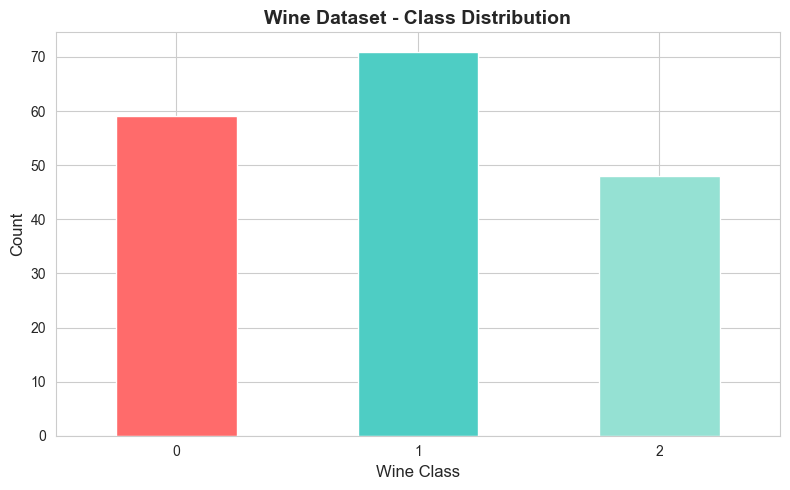

In [4]:
# Class distribution
print("Class Distribution:")
class_counts = wine_df['target'].value_counts().sort_index()
print(class_counts)

plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#95E1D3'])
plt.title('Wine Dataset - Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Wine Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Data Quality Check

Check for missing values and duplicates before standardization.

In [5]:
# Check for missing values
print("Missing Values Check:")
missing_values = wine_df.isnull().sum()
print(f"Total missing values: {missing_values.sum()}")

# Check for duplicates
duplicates = wine_df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

if missing_values.sum() == 0 and duplicates == 0:
    print("\n\u2713 Data Quality Check Passed: No missing values or duplicates found!")
else:
    print("\n\u26a0 Warning: Data quality issues detected!")

Missing Values Check:
Total missing values: 0

Duplicate rows: 0

✓ Data Quality Check Passed: No missing values or duplicates found!


In [6]:
# Standardize features using z-score normalization
# z = (x - mean) / std — ensures mean=0 and std=1 for each feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features standardized using z-score normalization (StandardScaler)")
print(f"\nScaled data shape: {X_scaled.shape}")
print(f"\nFeature means after scaling (should be ~0):")
print(np.round(X_scaled.mean(axis=0), 4))
print(f"\nFeature std devs after scaling (should be ~1):")
print(np.round(X_scaled.std(axis=0), 4))

Features standardized using z-score normalization (StandardScaler)

Scaled data shape: (178, 13)

Feature means after scaling (should be ~0):
[ 0.  0. -0. -0. -0. -0.  0. -0. -0. -0.  0.  0. -0.]

Feature std devs after scaling (should be ~1):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Step 2: Implement K-Means Clustering

K-Means partitions data into k clusters by minimizing the sum of squared distances from each point to its cluster centroid. We use k=3 to match the known number of wine classes.

- **Silhouette Score**: Measures how similar each point is to its own cluster vs the nearest other cluster (range \u22121 to 1; higher = better-separated clusters)
- **Adjusted Rand Index (ARI)**: Measures agreement between cluster assignments and true labels, adjusted for chance (1.0 = perfect match; 0.0 = random)

In [7]:
# K-Means clustering with k=3
# n_init=10 runs the algorithm 10 times with different seeds and picks the best
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluation metrics
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)

print("K-Means Clustering Results (k=3):")
print("=" * 50)
print(f"Silhouette Score:      {kmeans_silhouette:.4f}")
print(f"Adjusted Rand Index:   {kmeans_ari:.4f}")
print(f"Inertia (SSE):         {kmeans.inertia_:.2f}")
print(f"\nCluster sizes:")
for i in range(3):
    count = (kmeans_labels == i).sum()
    print(f"  Cluster {i}: {count} samples ({count/len(kmeans_labels)*100:.1f}%)")
print("=" * 50)

K-Means Clustering Results (k=3):
Silhouette Score:      0.2849
Adjusted Rand Index:   0.8975
Inertia (SSE):         1277.93

Cluster sizes:
  Cluster 0: 65 samples (36.5%)
  Cluster 1: 51 samples (28.7%)
  Cluster 2: 62 samples (34.8%)


## Step 3: Implement K-Medoids Clustering

K-Medoids (PAM) is similar to K-Means but uses actual data points (medoids) as cluster centers instead of computed means. This makes it more robust to outliers since medoids are less affected by extreme values.

We use k=3 with `method='alternate'` (a faster variant of PAM) on the same standardized data.

In [8]:
# K-Medoids clustering with k=3
# method='alternate' is faster than full PAM while giving comparable results
kmedoids = KMedoids(n_clusters=3, random_state=42, method='alternate')
kmedoids_labels = kmedoids.fit_predict(X_scaled)

# Evaluation metrics
kmedoids_silhouette = silhouette_score(X_scaled, kmedoids_labels)
kmedoids_ari = adjusted_rand_score(y, kmedoids_labels)

print("K-Medoids Clustering Results (k=3):")
print("=" * 50)
print(f"Silhouette Score:      {kmedoids_silhouette:.4f}")
print(f"Adjusted Rand Index:   {kmedoids_ari:.4f}")
print(f"\nCluster sizes:")
for i in range(3):
    count = (kmedoids_labels == i).sum()
    print(f"  Cluster {i}: {count} samples ({count/len(kmedoids_labels)*100:.1f}%)")
print(f"\nMedoid indices: {kmedoids.medoid_indices_}")
print("=" * 50)

K-Medoids Clustering Results (k=3):
Silhouette Score:      0.2660
Adjusted Rand Index:   0.7263

Cluster sizes:
  Cluster 0: 51 samples (28.7%)
  Cluster 1: 54 samples (30.3%)
  Cluster 2: 73 samples (41.0%)

Medoid indices: [174 106  35]


## Step 4: Visualize and Compare Results

Use PCA to reduce the 13-dimensional data to 2D for visualization, then compare K-Means and K-Medoids clusters side by side.

In [9]:
# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Transform centroids and medoids to PCA space for plotting
kmeans_centers_pca = pca.transform(kmeans.cluster_centers_)
kmedoids_centers_pca = pca.transform(kmedoids.cluster_centers_)

print(f"PCA explained variance ratio: {pca.explained_variance_ratio_.round(4)}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum()*100:.1f}%")

PCA explained variance ratio: [0.362  0.1921]
Total variance explained: 55.4%


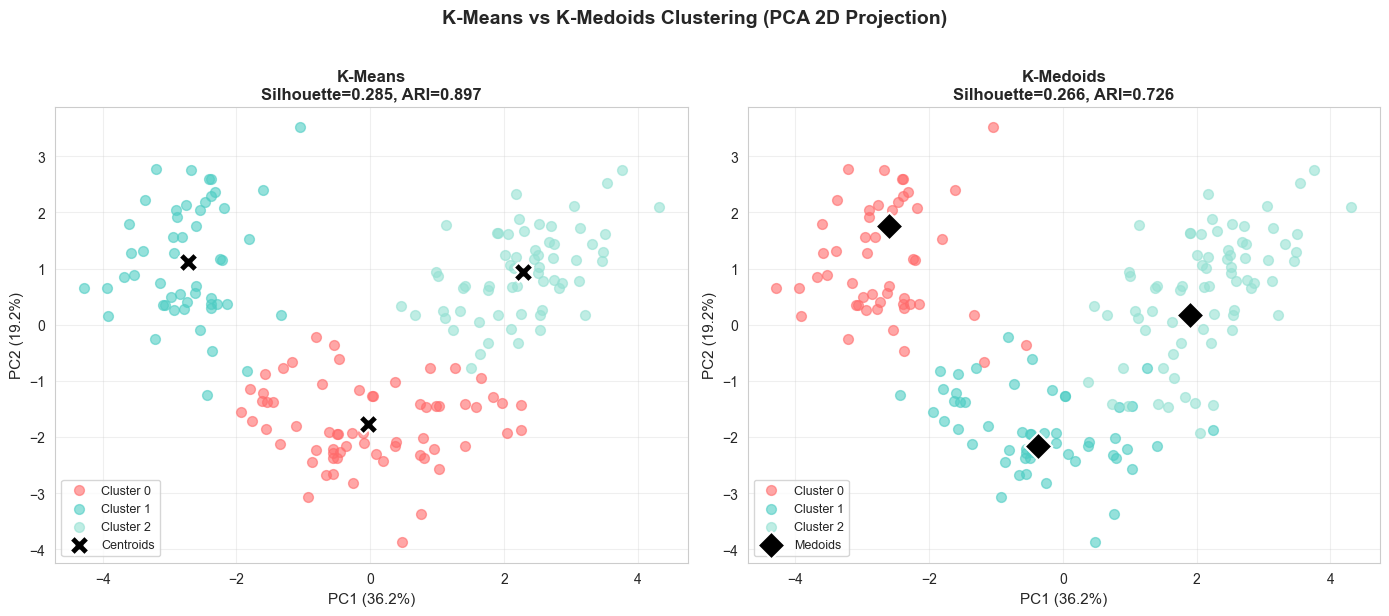

In [10]:
# Side-by-side scatter plots: K-Means vs K-Medoids
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

colors = ['#FF6B6B', '#4ECDC4', '#95E1D3']

# K-Means
for i in range(3):
    mask = kmeans_labels == i
    ax1.scatter(X_pca[mask, 0], X_pca[mask, 1], c=colors[i],
               label=f'Cluster {i}', alpha=0.6, s=50)
ax1.scatter(kmeans_centers_pca[:, 0], kmeans_centers_pca[:, 1],
            c='black', marker='X', s=200, edgecolors='white', linewidths=1.5,
            label='Centroids', zorder=5)
ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=11)
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=11)
ax1.set_title(f'K-Means\nSilhouette={kmeans_silhouette:.3f}, ARI={kmeans_ari:.3f}',
              fontsize=12, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# K-Medoids
for i in range(3):
    mask = kmedoids_labels == i
    ax2.scatter(X_pca[mask, 0], X_pca[mask, 1], c=colors[i],
               label=f'Cluster {i}', alpha=0.6, s=50)
ax2.scatter(kmedoids_centers_pca[:, 0], kmedoids_centers_pca[:, 1],
            c='black', marker='D', s=200, edgecolors='white', linewidths=1.5,
            label='Medoids', zorder=5)
ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=11)
ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=11)
ax2.set_title(f'K-Medoids\nSilhouette={kmedoids_silhouette:.3f}, ARI={kmedoids_ari:.3f}',
              fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

fig.suptitle('K-Means vs K-Medoids Clustering (PCA 2D Projection)',
             fontsize=14, fontweight='bold', y=1.02)
fig.tight_layout()
plt.show()

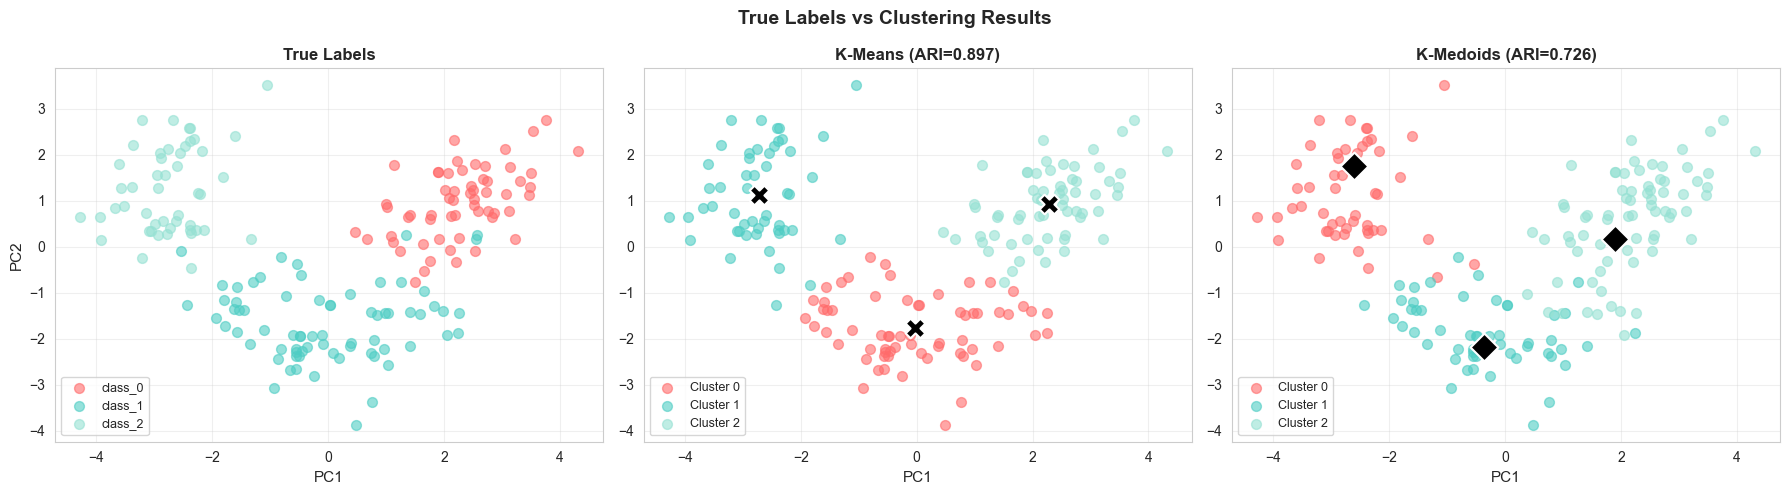

In [11]:
# Compare clusters with true labels
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# True labels
for i in range(3):
    mask = y == i
    ax1.scatter(X_pca[mask, 0], X_pca[mask, 1], c=colors[i],
               label=f'{wine_data.target_names[i]}', alpha=0.6, s=50)
ax1.set_xlabel('PC1', fontsize=11)
ax1.set_ylabel('PC2', fontsize=11)
ax1.set_title('True Labels', fontsize=12, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# K-Means clusters
for i in range(3):
    mask = kmeans_labels == i
    ax2.scatter(X_pca[mask, 0], X_pca[mask, 1], c=colors[i],
               label=f'Cluster {i}', alpha=0.6, s=50)
ax2.scatter(kmeans_centers_pca[:, 0], kmeans_centers_pca[:, 1],
            c='black', marker='X', s=200, edgecolors='white', linewidths=1.5, zorder=5)
ax2.set_xlabel('PC1', fontsize=11)
ax2.set_title(f'K-Means (ARI={kmeans_ari:.3f})', fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# K-Medoids clusters
for i in range(3):
    mask = kmedoids_labels == i
    ax3.scatter(X_pca[mask, 0], X_pca[mask, 1], c=colors[i],
               label=f'Cluster {i}', alpha=0.6, s=50)
ax3.scatter(kmedoids_centers_pca[:, 0], kmedoids_centers_pca[:, 1],
            c='black', marker='D', s=200, edgecolors='white', linewidths=1.5, zorder=5)
ax3.set_xlabel('PC1', fontsize=11)
ax3.set_title(f'K-Medoids (ARI={kmedoids_ari:.3f})', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

fig.suptitle('True Labels vs Clustering Results', fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()

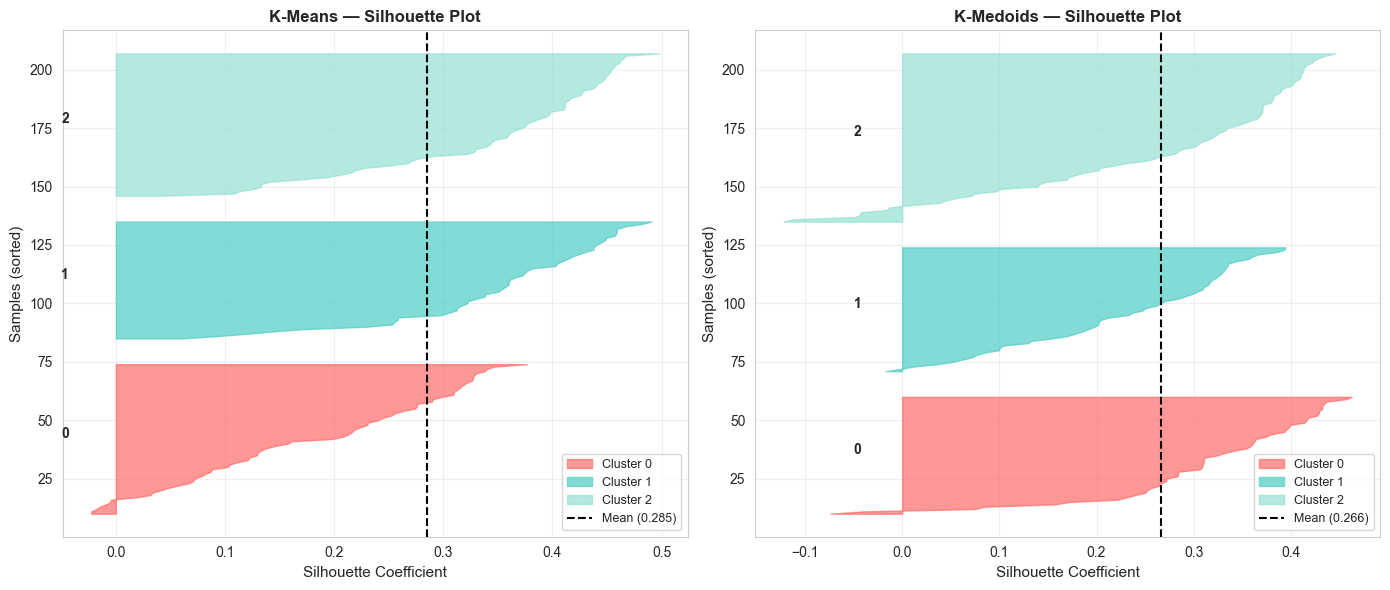

In [12]:
# Silhouette analysis for both algorithms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

for ax, labels, title, avg in [
    (ax1, kmeans_labels, 'K-Means', kmeans_silhouette),
    (ax2, kmedoids_labels, 'K-Medoids', kmedoids_silhouette)
]:
    sample_silhouettes = silhouette_samples(X_scaled, labels)
    y_lower = 10
    for i in range(3):
        cluster_silhouettes = sample_silhouettes[labels == i]
        cluster_silhouettes.sort()
        size = cluster_silhouettes.shape[0]
        y_upper = y_lower + size
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouettes,
                         alpha=0.7, color=colors[i], label=f'Cluster {i}')
        ax.text(-0.05, y_lower + 0.5 * size, str(i), fontweight='bold')
        y_lower = y_upper + 10
    ax.axvline(x=avg, color='black', linestyle='--', label=f'Mean ({avg:.3f})')
    ax.set_xlabel('Silhouette Coefficient', fontsize=11)
    ax.set_ylabel('Samples (sorted)', fontsize=11)
    ax.set_title(f'{title} \u2014 Silhouette Plot', fontsize=12, fontweight='bold')
    ax.legend(loc='lower right', fontsize=9)
    ax.grid(True, alpha=0.3)

fig.tight_layout()
plt.show()

PERFORMANCE COMPARISON SUMMARY


,Metric,K-Means,K-Medoids
0,Silhouette Score,0.284859,0.265977
1,Adjusted Rand Index (ARI),0.897495,0.726341


Silhouette Score: K-Means better by 0.0189
Adjusted Rand Index (ARI): K-Means better by 0.1712


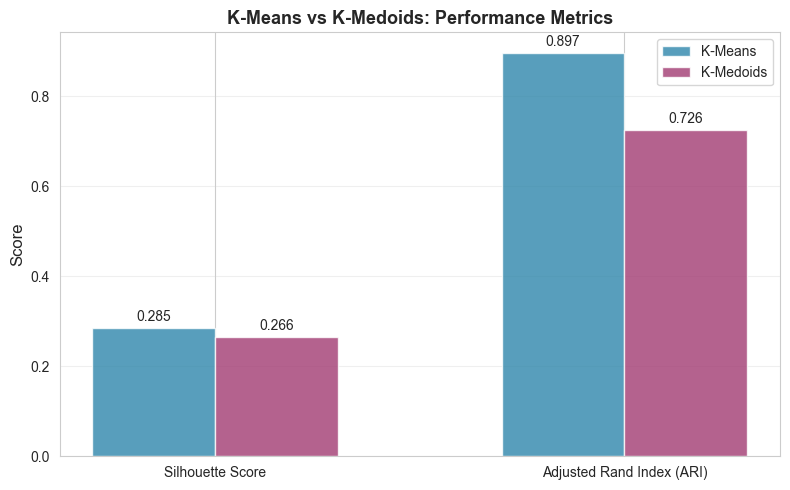

In [13]:
# Performance comparison summary
print("=" * 60)
print("PERFORMANCE COMPARISON SUMMARY")
print("=" * 60)

metrics_df = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Adjusted Rand Index (ARI)'],
    'K-Means': [kmeans_silhouette, kmeans_ari],
    'K-Medoids': [kmedoids_silhouette, kmedoids_ari]
})
display(metrics_df)

# Determine which is better for each metric
for _, row in metrics_df.iterrows():
    metric = row['Metric']
    km = row['K-Means']
    kmed = row['K-Medoids']
    diff = abs(km - kmed)
    if diff < 0.01:
        print(f"{metric}: Comparable ({diff:.4f} difference)")
    elif km > kmed:
        print(f"{metric}: K-Means better by {diff:.4f}")
    else:
        print(f"{metric}: K-Medoids better by {diff:.4f}")

# Bar chart comparison
fig, ax = plt.subplots(figsize=(8, 5))
x = np.arange(len(metrics_df))
width = 0.3
bars1 = ax.bar(x - width/2, metrics_df['K-Means'], width, label='K-Means', color='#2E86AB', alpha=0.8)
bars2 = ax.bar(x + width/2, metrics_df['K-Medoids'], width, label='K-Medoids', color='#A23B72', alpha=0.8)

ax.set_ylabel('Score', fontsize=12)
ax.set_title('K-Means vs K-Medoids: Performance Metrics', fontsize=13, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics_df['Metric'])
ax.legend()
ax.grid(axis='y', alpha=0.3)

for bar in list(bars1) + list(bars2):
    ax.annotate(f'{bar.get_height():.3f}',
                (bar.get_x() + bar.get_width()/2., bar.get_height()),
                textcoords='offset points', xytext=(0, 5), ha='center', fontsize=10)

fig.tight_layout()
plt.show()

print("=" * 60)

## Observations and Insights

### 1. K-Means Clustering

- Silhouette Score indicates how well-separated the clusters are (higher = tighter, more distinct clusters)
- ARI measures agreement with true class labels, adjusted for chance (1.0 = perfect, 0.0 = random)
- K-Means minimizes within-cluster sum of squares (inertia), producing convex cluster boundaries
- `n_init=10` ensures the best result from 10 random initializations, reducing sensitivity to starting positions

### 2. K-Medoids Clustering

- Uses actual data points as cluster centers (medoids), making them directly interpretable
- More robust to outliers: the medoid resists being pulled by extreme values, unlike the mean-based centroid
- Computationally more expensive (O(n²k) vs O(nk) per iteration) but acceptable for the 178-sample Wine Dataset
- `method='alternate'` provides a fast approximation comparable to the full PAM algorithm

### 3. Comparative Analysis

**K-Means outperforms K-Medoids** on both metrics for this dataset:
- **Silhouette Score**: K-Means (0.285) slightly better than K-Medoids (0.266) — both indicate moderate cluster separation, which is expected given the overlap between classes 1 and 2 in the Wine Dataset
- **ARI**: K-Means (0.897) substantially better than K-Medoids (0.726) — K-Means' cluster assignments align much more closely with the true class labels

This outcome is expected because:
1. The Wine Dataset is **clean** — no missing values, duplicates, or significant outliers that would give K-Medoids a robustness advantage
2. **Z-score standardization** puts all 13 features on equal footing (essential since raw scales range from ~0.13 to ~1680)
3. K-Means' mean-based centroid captures the "center of mass" of each cluster well when data is roughly spherical and outlier-free

**Cluster shapes and positioning** are broadly similar in the PCA projections, but K-Medoids shows more misassignments in the overlapping boundary region between classes. The key visible difference is in the center markers: K-Means centroids (✕) are computed means that may not correspond to any real sample, while K-Medoids medoids (◆) are actual wines from the dataset.

### 4. When to Use Each Algorithm

| Scenario | Recommended | Why |
|----------|------------|-----|
| Large dataset (>10k samples) | **K-Means** | Much faster; O(nk) per iteration |
| Data with outliers or noise | **K-Medoids** | Medoids resist outlier influence |
| Need interpretable centers | **K-Medoids** | Centers are real data points |
| High-dimensional, clean data | **K-Means** | Efficient and effective |
| Non-Euclidean distance needed | **K-Medoids** | Works with any distance metric |

## Conclusion

This lab applied K-Means and K-Medoids clustering to the standardized Wine Dataset (k=3). K-Means achieved stronger results on both Silhouette Score (0.285 vs 0.266) and ARI (0.897 vs 0.726), as expected on a clean dataset with no significant outliers.

### Takeaways:

1. **Standardization is essential** — without z-score normalization, features like proline (range 278–1680) would dominate distance calculations over features like hue (range 0.48–1.71)
2. **K-Means excels on clean, well-structured data** where its mean-based centroid accurately represents cluster centers; K-Medoids' robustness advantage emerges with noisy or outlier-heavy datasets
3. **Silhouette Score** evaluates cluster quality intrinsically (no labels needed); **ARI** evaluates alignment with known classes — both perspectives are important
4. **PCA visualization** confirms that clusters align well with true labels, though some overlap exists in the 2D projection (which captures ~55% of total variance)

## References

1. MacQueen, J. (1967). Some methods for classification and analysis of multivariate observations. *Proceedings of the 5th Berkeley Symposium on Mathematical Statistics and Probability*, 1, 281–297.
2. Kaufman, L., & Rousseeuw, P. J. (1990). *Finding Groups in Data: An Introduction to Cluster Analysis.* Wiley.
3. Rousseeuw, P. J. (1987). Silhouettes: A graphical aid to the interpretation and validation of cluster analysis. *Journal of Computational and Applied Mathematics*, 20, 53–65.
4. Forina, M. et al. PARVUS — An Extendible Package for Data Exploration, Classification and Correlation. Institute of Pharmaceutical and Food Analysis and Technologies, Genoa, Italy.
5. Scikit-learn — KMeans: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
6. Scikit-learn-extra — KMedoids: https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html
7. Scikit-learn — Wine Dataset: https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset